In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE ## untuk oversampling
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('D:/Tugas/Kecerdasan Buatan/Paper/ulasan.csv')
data.head()

,ulasan,rating_bintang,sentimen,aspek
0,Mantap segala jenis casing HP cahrger HP tripo...,5.0,positif,barang
1,barang lengkap pelayanan ramah banyak diskon.,5.0,positif,barang
2,Barang nya lengkap pelayanan baik mantab,5.0,positif,barang
3,Pelayan cepat paham akan type hp ramah&murah s...,4.0,positif,pelayanan
4,Pelayanan cepat sangat ramah barang lengkap,5.0,positif,pelayanan


##  DATA UNDERSTANDING

In [3]:
data.dtypes

ulasan             object
rating_bintang    float64
sentimen           object
aspek              object
dtype: object

In [4]:
data.shape

(1311, 4)

In [5]:
data.isnull().sum()

ulasan            189
rating_bintang      1
sentimen            0
aspek             203
dtype: int64

In [6]:
# Membaca file CSV
df = pd.read_csv('D:/Tugas/Kecerdasan Buatan/Paper/ulasan.csv')

# Menghitung jumlah ulasan dengan setiap jenis sentimen secara keseluruhan
sentimen_counts = df['sentimen'].value_counts()

# Menampilkan hasil
print("Jumlah ulasan dengan sentimen positif, netral, dan negatif secara keseluruhan:")
print(sentimen_counts)

Jumlah ulasan dengan sentimen positif, netral, dan negatif secara keseluruhan:
sentimen
positif    1239
negatif      44
netral       28
Name: count, dtype: int64


In [7]:
## jika ingin menghapus data yang null :
data = data.dropna()

In [8]:
data.duplicated().sum()

153

In [9]:
#jika ingin menghapus data duplikat
data = data.drop_duplicates()

In [10]:
data.describe(include='all')

,ulasan,rating_bintang,sentimen,aspek
count,954,954.000000,954,954
unique,925,NaN,3,3
top,Bagus,NaN,positif,pelayanan
freq,6,NaN,897,531
mean,NaN,4.754717,NaN,NaN
std,NaN,0.773786,NaN,NaN
min,NaN,1.000000,NaN,NaN
25%,NaN,5.000000,NaN,NaN
50%,NaN,5.000000,NaN,NaN
75%,NaN,5.000000,NaN,NaN


## PREPROCESSING TEKS

In [11]:
data.head()

,ulasan,rating_bintang,sentimen,aspek
0,Mantap segala jenis casing HP cahrger HP tripo...,5.0,positif,barang
1,barang lengkap pelayanan ramah banyak diskon.,5.0,positif,barang
2,Barang nya lengkap pelayanan baik mantab,5.0,positif,barang
3,Pelayan cepat paham akan type hp ramah&murah s...,4.0,positif,pelayanan
4,Pelayanan cepat sangat ramah barang lengkap,5.0,positif,pelayanan


In [12]:
## mengubah teks menjadi lowercase
data['ulasan'] = data['ulasan'].str.lower()
data.head

<bound method NDFrame.head of                                                  ulasan  rating_bintang  \
0     mantap segala jenis casing hp cahrger hp tripo...             5.0   
1         barang lengkap pelayanan ramah banyak diskon.             5.0   
2              barang nya lengkap pelayanan baik mantab             5.0   
3     pelayan cepat paham akan type hp ramah&murah s...             4.0   
4           pelayanan cepat sangat ramah barang lengkap             5.0   
...                                                 ...             ...   
1306                                               joss             5.0   
1307  di frenz suropati langganan tempered glass,mur...             5.0   
1308  toko accesories handphone termurah dan terleng...             5.0   
1309     lengkap kalau mau.. khusus pemakaian plus plus             5.0   
1310                            langganan bisa cod hehe             5.0   

     sentimen      aspek  
0     positif     barang  
1     positif  

In [13]:
## normalisasi. sama seperti replace

norm = {"cahrger": "charger", "tripot": "tripod", "Barangnyaaa": "Barangnya", "gk": "tidak", "vocer": "voucher", "mantab": "mantap", "type": "tipe", "C to C": "USB-C to USB-C", "ngga": "tidak", "garansikan": "klaim garansi", "datanya": "data nya", "bulan 11/2022": "bulan November 2022", "hp": "HP", "keluar logo petir": "muncul logo petir", "nambah": "menambah", "idup": "hidup", "yg": "yang", "bagusss": "bagus", "ges": "ges", "hehe": "hehe", "aksesoris": "aksesoris", "abis": "habis", "terimakasih": "terima kasih", "tamah": "ramah", "claim": "klaim", "peertama": "pertama", "ditanyai": "ditanya", "diem": "diam", "gak": "tidak", "liatin": "melihat", "Acc": "aksesoris", "diklam": "klaim", "best": "terbaik", "segla": "segala", "cepet": "cepat", "pelayanannyaa": "pelayanannya", "sangaatt": "sangat", "ramaahh": "ramah", "terbaikkk": "terbaik", "terlengkaaapp": "terlengkap", "lengkaap": "lengkap", "dateng": "datang", "di layani": "dilayani", "org": "orang", "di beri": "diberi", "tau": "tahu", "nanya": "bertanya", "lentidakap": "lengkap", "lengkap": "lengkap", "terjangkau": "terjangkau"}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])  # Menggunakan norm[i] untuk mendapatkan nilai yang sesuai
    return str_text

# Pastikan Anda telah mendefinisikan 'data' sebelumnya
data['ulasan'] = data['ulasan'].apply(lambda x: normalisasi(x))

In [14]:
# stopword. untuk menghilangkan kata yang tidak berbobot atau tidak terlalu penting (ex: yaa, dan, dll)
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

more_stop_words = []

stopword_factory = StopWordRemoverFactory()
stop_words = stopword_factory.get_stop_words() + more_stop_words
stop_words_remover_new = stopword_factory.create_stop_word_remover()

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

data['ulasan'] = data['ulasan'].apply(stopword)
data.head()


,ulasan,rating_bintang,sentimen,aspek
0,mantap segala jenis casing HP charger HP tripo...,5.0,positif,barang
1,barang lengkap pelayanan ramah banyak diskon.,5.0,positif,barang
2,barang nya lengkap pelayanan baik mantap,5.0,positif,barang
3,pelayan cepat paham tipe HP ramah&murah senyum,4.0,positif,pelayanan
4,pelayanan cepat sangat ramah barang lengkap,5.0,positif,pelayanan


In [15]:
## tokenisasi. memisahkan kalimat yang ada pada data. jadinya kata kata akan terpisah

tokenized = data['ulasan'].apply(lambda x:x.split())
tokenized

0       [mantap, segala, jenis, casing, HP, charger, H...
1       [barang, lengkap, pelayanan, ramah, banyak, di...
2         [barang, nya, lengkap, pelayanan, baik, mantap]
3       [pelayan, cepat, paham, tipe, HP, ramah&murah,...
4       [pelayanan, cepat, sangat, ramah, barang, leng...
                              ...                        
1306                                               [joss]
1307    [frenz, suropati, latidaknan, tempered, glass,...
1308    [toko, accesories, handphone, termurah, terlen...
1309    [lengkap, kalau, mau.., khusus, pemakaian, plu...
1310                              [latidaknan, cod, hehe]
Name: ulasan, Length: 954, dtype: object

In [16]:
## steming. mengubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi untuk melakukan stemming
def stemming(ulasan):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    kata_dasar = []
    
    # Tokenisasi kata per kata
    kata = ulasan.split()
    
    # Lakukan stemming pada setiap kata
    for kata_token in kata:
        kata_stem = stemmer.stem(kata_token)
        kata_dasar.append(kata_stem)
    
    # Gabungkan kembali kata-kata yang telah distem menjadi sebuah kalimat utuh
    kalimat_dasar = " ".join(kata_dasar)
    
    return kalimat_dasar

# Melakukan stemming pada setiap baris ulasan
data['ulasan'] = data['ulasan'].apply(stemming)

# Menghapus baris yang nilainya hilang (np.nan)
data = data.dropna()

# Menghapus nilai netral
data = data[data['sentimen'] != 'netral']

# Menyimpan hasil ulasan yang telah distem dan dibersihkan ke dalam file CSV
data.to_csv('D:/Tugas/Kecerdasan Buatan/Paper/ulasanbersih.csv', index=False)

# Membaca kembali file CSV yang telah disimpan (jika diperlukan)
# Jika Anda perlu memuat kembali data setelah menyimpan
data_clean = pd.read_csv('D:/Tugas/Kecerdasan Buatan/Paper/ulasanbersih.csv', encoding='latin1')
data_clean.head()

,ulasan,rating_bintang,sentimen,aspek
0,mantap segala jenis casing hp charger hp tripo...,5.0,positif,barang
1,barang lengkap layan ramah banyak diskon,5.0,positif,barang
2,barang nya lengkap layan baik mantap,5.0,positif,barang
3,layan cepat paham tipe hp ramah murah senyum,4.0,positif,pelayanan
4,layan cepat sangat ramah barang lengkap,5.0,positif,pelayanan


In [17]:
data_clean.head()

,ulasan,rating_bintang,sentimen,aspek
0,mantap segala jenis casing hp charger hp tripo...,5.0,positif,barang
1,barang lengkap layan ramah banyak diskon,5.0,positif,barang
2,barang nya lengkap layan baik mantap,5.0,positif,barang
3,layan cepat paham tipe hp ramah murah senyum,4.0,positif,pelayanan
4,layan cepat sangat ramah barang lengkap,5.0,positif,pelayanan


In [18]:
## jika hasilnya hanya muncul ulasan saja (tanpa rating dan sentimen)
at1 = pd.read_csv('D:/Tugas/Kecerdasan Buatan/Paper/ulasanbersih.csv')
at2 = pd.read_csv('D:/Tugas/Kecerdasan Buatan/Paper/ulasan.csv')
att2 = at2['sentimen'] ## jika hanya ingin menggabungkan sentimen.

result = pd.concat([at1, att2], axis=1)
data_clean

,ulasan,rating_bintang,sentimen,aspek
0,mantap segala jenis casing hp charger hp tripo...,5.0,positif,barang
1,barang lengkap layan ramah banyak diskon,5.0,positif,barang
2,barang nya lengkap layan baik mantap,5.0,positif,barang
3,layan cepat paham tipe hp ramah murah senyum,4.0,positif,pelayanan
4,layan cepat sangat ramah barang lengkap,5.0,positif,pelayanan
...,...,...,...,...
928,joss,5.0,positif,pelayanan
929,frenz suropati latidaknan tempered glass murah...,5.0,positif,barang
930,toko accesories handphone murah lengkap kota b...,5.0,positif,pelayanan
931,lengkap kalau mau khusus pakai plus plus,5.0,positif,barang


In [19]:
## Menghapus baris yang nilainya hilang (np.nan)
data_clean = data_clean.dropna()

## Menghapus nilai netral (jika ada)
data_clean = data_clean[data_clean['sentimen'] != 'netral']

In [20]:
## mengubah positif menjadi 1, negatif menjadi 0

data_clean = data_clean.replace({'positif':1, 'negatif':0})
data_clean.head()

C:\Users\KASIR\AppData\Local\Temp\ipykernel_11004\1641413693.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean = data_clean.replace({'positif':1, 'negatif':0})


,ulasan,rating_bintang,sentimen,aspek
0,mantap segala jenis casing hp charger hp tripo...,5.0,1,barang
1,barang lengkap layan ramah banyak diskon,5.0,1,barang
2,barang nya lengkap layan baik mantap,5.0,1,barang
3,layan cepat paham tipe hp ramah murah senyum,4.0,1,pelayanan
4,layan cepat sangat ramah barang lengkap,5.0,1,pelayanan


In [21]:
df = pd.read_csv('D:/Tugas/Kecerdasan Buatan/Paper/ulasan.csv')
# Memilah ulasan berdasarkan kategori aspeknya
aspek_pelayanan = df[df['aspek'] == 'pelayanan']
aspek_kualitas = df[df['aspek'] == 'kualitas']
aspek_barang = df[df['aspek'] == 'barang']

# Memeriksa jumlah ulasan untuk setiap kategori aspek
print("Jumlah ulasan untuk aspek Pelayanan:", len(aspek_pelayanan))
print("Jumlah ulasan untuk aspek Kualitas:", len(aspek_kualitas))
print("Jumlah ulasan untuk aspek Barang:", len(aspek_barang))

Jumlah ulasan untuk aspek Pelayanan: 637
Jumlah ulasan untuk aspek Kualitas: 137
Jumlah ulasan untuk aspek Barang: 334


In [22]:
sentimen_pelayanan = aspek_pelayanan.groupby('sentimen').size()
sentimen_kualitas = aspek_kualitas.groupby('sentimen').size()
sentimen_barang = aspek_barang.groupby('sentimen').size()

print("\nJumlah sentimen untuk aspek Pelayanan:")
print(sentimen_pelayanan)

print("\nJumlah sentimen untuk aspek Kualitas:")
print(sentimen_kualitas)

print("\nJumlah sentimen untuk aspek Barang:")
print(sentimen_barang)


Jumlah sentimen untuk aspek Pelayanan:
sentimen
negatif     21
netral       4
positif    612
dtype: int64

Jumlah sentimen untuk aspek Kualitas:
sentimen
negatif      3
netral       1
positif    133
dtype: int64

Jumlah sentimen untuk aspek Barang:
sentimen
negatif     14
netral      16
positif    304
dtype: int64


### VISUALISASI KATA

In [23]:
data_negatif = data_clean[data_clean['sentimen'] == 0]
data_positif = data_clean[data_clean['sentimen'] == 1]

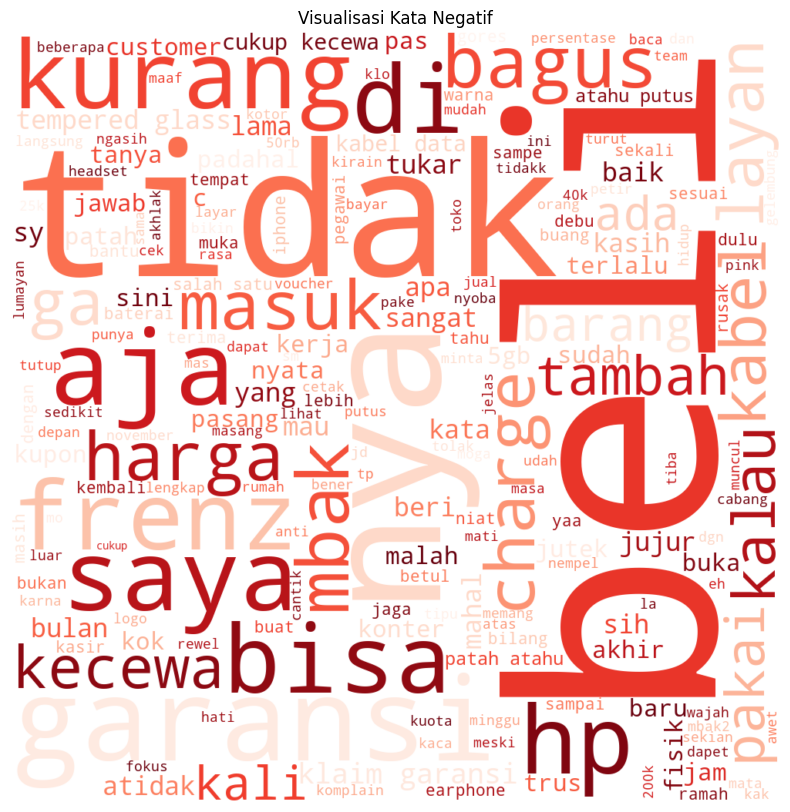

In [24]:
all_text_negatif = ' '.join(word for word in data_negatif["ulasan"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_negatif)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

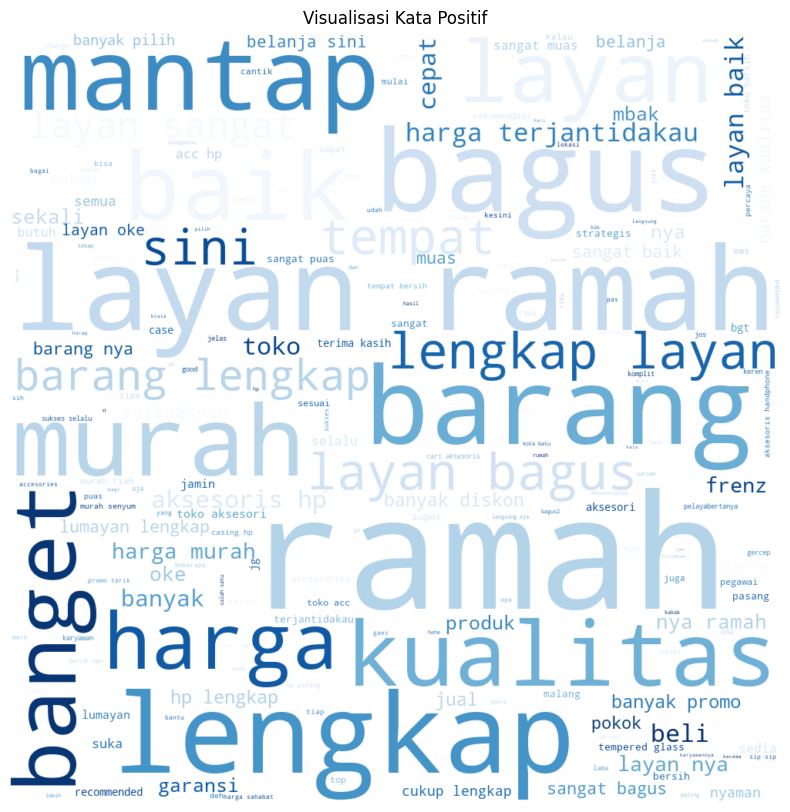

In [25]:
all_text_positif = ' '.join(word for word in data_positif["ulasan"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_positif)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

In [26]:
## menghitus kuantitas sentimen
data_clean['sentimen'].value_counts()

sentimen
1    893
0     36
Name: count, dtype: int64

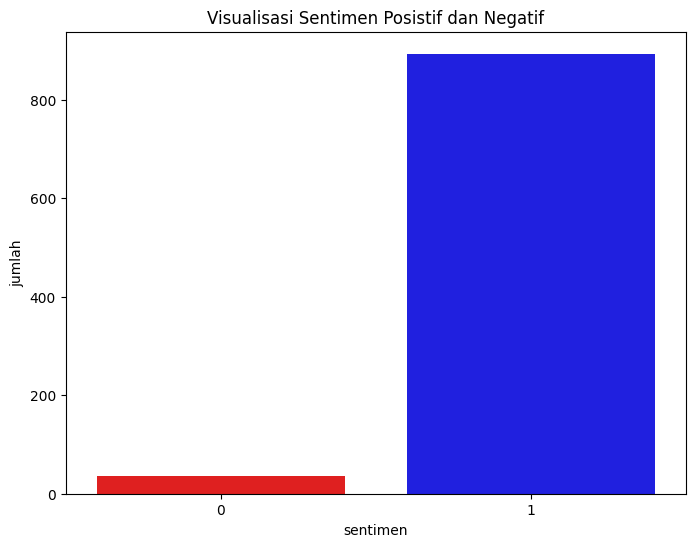

In [27]:
## menvisualisasikan kuantitas sentimen
plt.figure(figsize=(8, 6))
sns.countplot(data=data_clean, x='sentimen', hue='sentimen', palette={0: "red", 1: "blue"}, legend=False)
plt.title('Visualisasi Sentimen Posistif dan Negatif')
plt.xlabel('sentimen')
plt.ylabel('jumlah')
plt.show()

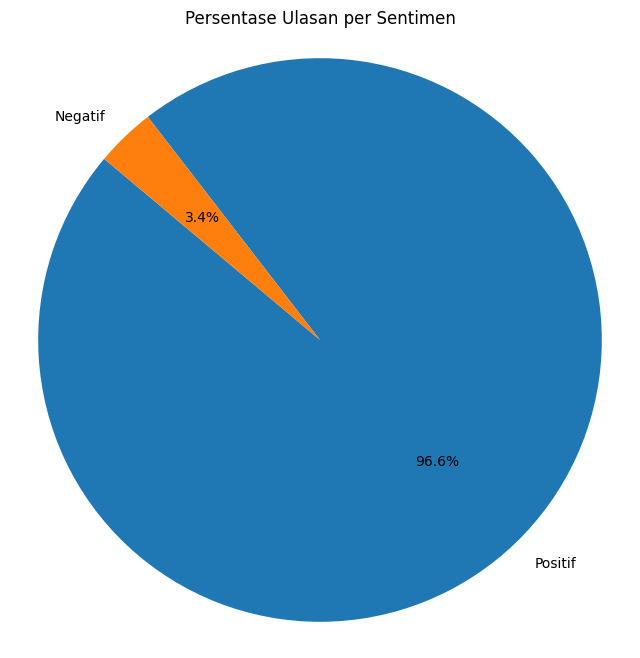

In [28]:
#DATA AWAL

# Menghitung jumlah ulasan per sentimen
jumlah_positif = len(df[df['sentimen'] == 'positif'])
jumlah_negatif = len(df[df['sentimen'] == 'negatif'])

# Data untuk pie chart
jumlah_sentimen = [jumlah_positif, jumlah_negatif]
labels = ['Positif', 'Negatif']

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(jumlah_sentimen, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Ulasan per Sentimen')
plt.axis('equal')  # Memastikan pie chart menjadi lingkaran
plt.show()


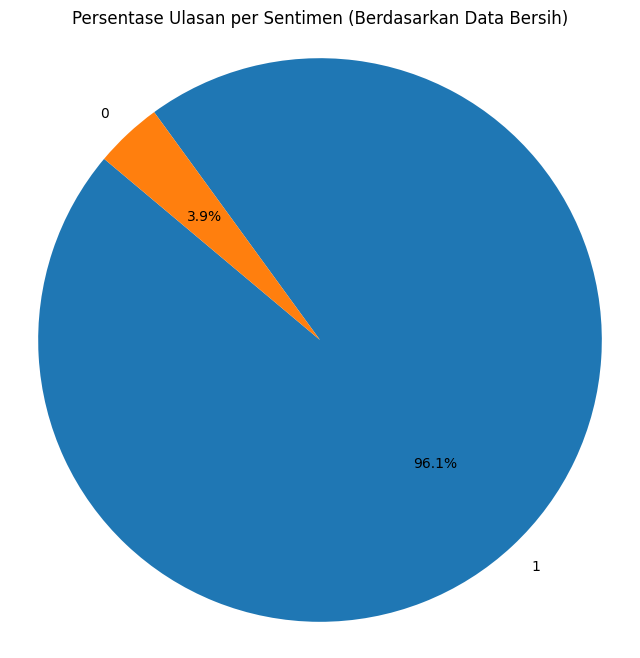

In [29]:
# DATA BERSIH
# Menghitung jumlah ulasan per sentimen dari data bersih
jumlah_sentimen = data_clean['sentimen'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(jumlah_sentimen, labels=jumlah_sentimen.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Ulasan per Sentimen (Berdasarkan Data Bersih)')
plt.axis('equal')  # Memastikan pie chart menjadi lingkaran
plt.show()


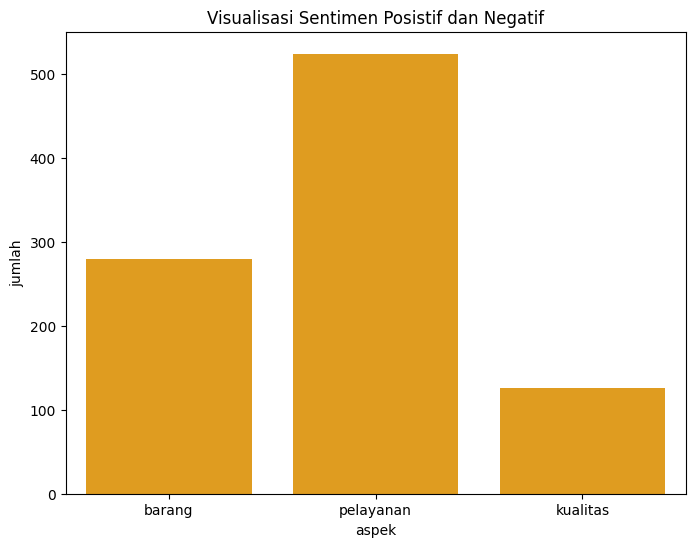

In [30]:
## menvisualisasikan kuantitas sentimen
plt.figure(figsize=(8, 6))
sns.countplot(data=data_clean, x='aspek', hue='aspek', palette={"orange"}, legend=False)
plt.title('Visualisasi Sentimen Posistif dan Negatif')
plt.xlabel('aspek')
plt.ylabel('jumlah')
plt.show()

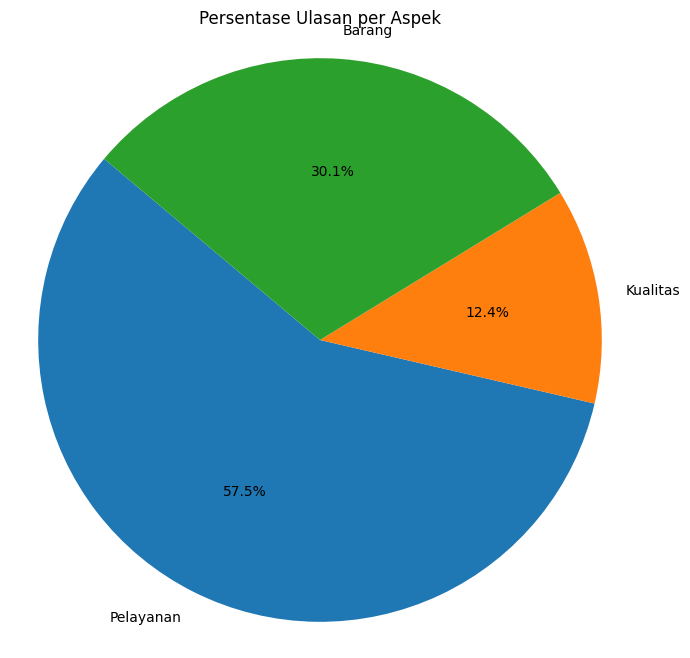

In [31]:
jumlah_ulasan_per_aspek = {
    'Pelayanan': len(aspek_pelayanan),
    'Kualitas': len(aspek_kualitas),
    'Barang': len(aspek_barang)
}

# Data untuk pie chart
jumlah_ulasan = list(jumlah_ulasan_per_aspek.values())
labels = list(jumlah_ulasan_per_aspek.keys())

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(jumlah_ulasan, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Ulasan per Aspek')
plt.axis('equal')  # Memastikan pie chart menjadi lingkaran
plt.show()

## DATA PREPARATION

In [32]:
data_clean = data_clean.dropna(subset=['ulasan', 'sentimen'])

In [33]:
data_clean['ulasan'] = data_clean['ulasan'].astype(str)

In [34]:
print(data_clean.isnull().sum())

ulasan            0
rating_bintang    0
sentimen          0
aspek             0
dtype: int64


In [35]:
# memisahkan data latih dan data uji
x = data_clean['ulasan']
y = data_clean['sentimen']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [36]:
x_pelayanan = aspek_pelayanan['ulasan']
y_pelayanan = aspek_pelayanan['sentimen']
x_pelayanan_train, x_pelayanan_test, y_pelayanan_train, y_pelayanan_test = train_test_split(x_pelayanan, y_pelayanan, test_size=0.1, random_state=42)

In [37]:
x_barang = aspek_barang['ulasan']
y_barang = aspek_barang['sentimen']
x_barang_train, x_barang_test, y_barang_train, y_barang_test = train_test_split(x_barang, y_barang, test_size=0.1, random_state=42)

In [38]:
x_kualitas = aspek_kualitas['ulasan']
y_kualitas = aspek_kualitas['sentimen']
x_kualitas_train, x_kualitas_test, y_kualitas_train, y_kualitas_test = train_test_split(x_kualitas, y_kualitas, test_size=0.1, random_state=42)

In [39]:
x_pelayanan_train = x_pelayanan_train.dropna()
x_pelayanan_test = x_pelayanan_test.dropna()
x_barang_train = x_barang_train.dropna()
x_barang_test = x_barang_test.dropna()

In [40]:
print("Checking null values in training and test sets...")
print("Pelayanan Train null values:", x_pelayanan_train.isnull().sum())
print("Pelayanan Test null values:", x_pelayanan_test.isnull().sum())
print("Barang Train null values:", x_barang_train.isnull().sum())
print("Barang Test null values:", x_barang_test.isnull().sum())
print("Kualitas Train null values:", x_kualitas_train.isnull().sum())
print("Kualitas Test null values:", x_kualitas_test.isnull().sum())

Checking null values in training and test sets...
Pelayanan Train null values: 0
Pelayanan Test null values: 0
Barang Train null values: 0
Barang Test null values: 0
Kualitas Train null values: 0
Kualitas Test null values: 0


In [41]:
pelayanan_train = pd.DataFrame({'ulasan': x_pelayanan_train, 'sentimen': y_pelayanan_train}).dropna()
x_pelayanan_train = pelayanan_train['ulasan']
y_pelayanan_train = pelayanan_train['sentimen']

pelayanan_test = pd.DataFrame({'ulasan': x_pelayanan_test, 'sentimen': y_pelayanan_test}).dropna()
x_pelayanan_test = pelayanan_test['ulasan']
y_pelayanan_test = pelayanan_test['sentimen']

In [42]:
barang_train = pd.DataFrame({'ulasan': x_barang_train, 'sentimen': y_barang_train}).dropna()
x_barang_train = barang_train['ulasan']
y_barang_train = barang_train['sentimen']

barang_test = pd.DataFrame({'ulasan': x_barang_test, 'sentimen': y_barang_test}).dropna()
x_barang_test = barang_test['ulasan']
y_barang_test = barang_test['sentimen']

In [43]:
# Membuat objek CountVectorizer dan menyesuaikannya dengan data pelatihan
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Menggunakan objek CountVectorizer yang sama untuk data pelayanan
x_pelayanan_train_vec = vectorizer.transform(x_pelayanan_train)
x_pelayanan_test_vec = vectorizer.transform(x_pelayanan_test)

# Menggunakan objek CountVectorizer yang sama untuk data barang
x_barang_train_vec = vectorizer.transform(x_barang_train)
x_barang_test_vec = vectorizer.transform(x_barang_test)

# Menggunakan objek CountVectorizer yang sama untuk data kualitas
x_kualitas_train_vec = vectorizer.transform(x_kualitas_train)
x_kualitas_test_vec = vectorizer.transform(x_kualitas_test)

In [44]:
from imblearn.over_sampling import SMOTE

# Membuat instance SMOTE dengan konfigurasi k_neighbors yang sesuai
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=1)

# Melakukan oversampling pada data latih
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_vec, y_train)


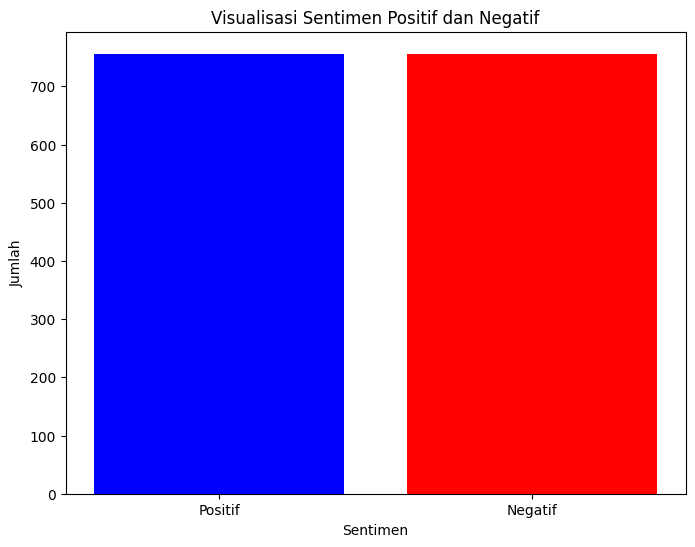

In [45]:
# contoh hasil resampling
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color=['red', 'blue'])
plt.title('Visualisasi Sentimen Positif dan Negatif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

## MODELING

In [46]:
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train_resampled, y_train_resampled) ##jika menggunakan oversampling maka (x_train_resampled, y_train_resampled)

MultinomialNB()

In [47]:
model_pelayanan = MultinomialNB()
model_pelayanan.fit(x_pelayanan_train_vec, y_pelayanan_train)

MultinomialNB()

In [48]:
model_barang = MultinomialNB()
model_barang.fit(x_barang_train_vec, y_barang_train)

MultinomialNB()

In [49]:
model_kualitas = MultinomialNB()
model_kualitas.fit(x_kualitas_train_vec, y_kualitas_train)

MultinomialNB()

In [50]:
y_pelayanan_pred = model_pelayanan.predict(x_pelayanan_test_vec)
accuracy_pelayanan = accuracy_score(y_pelayanan_test, y_pelayanan_pred)
report_pelayanan = classification_report(y_pelayanan_test, y_pelayanan_pred)

print("Akurasi Model untuk Aspek Pelayanan:", accuracy_pelayanan)
print("Laporan Klasifikasi untuk Aspek Pelayanan :\n", report_pelayanan)

Akurasi Model untuk Aspek Pelayanan: 0.984375
Laporan Klasifikasi untuk Aspek Pelayanan :
               precision    recall  f1-score   support

     negatif       1.00      0.75      0.86         4
     positif       0.98      1.00      0.99        60

    accuracy                           0.98        64
   macro avg       0.99      0.88      0.92        64
weighted avg       0.98      0.98      0.98        64



In [51]:
y_barang_pred = model_barang.predict(x_barang_test_vec)
accuracy_barang = accuracy_score(y_barang_test, y_barang_pred)
report_barang = classification_report(y_barang_test, y_barang_pred)

print("Akurasi Model untuk Aspek Barang:", accuracy_barang)
print("Laporan Klasifikasi untuk Aspek Barang :\n", report_barang)

Akurasi Model untuk Aspek Barang: 0.8235294117647058
Laporan Klasifikasi untuk Aspek Barang :
               precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         2
      netral       0.00      0.00      0.00         2
     positif       0.88      0.93      0.90        30

    accuracy                           0.82        34
   macro avg       0.29      0.31      0.30        34
weighted avg       0.77      0.82      0.80        34



In [52]:
y_kualitas_pred = model_kualitas.predict(x_kualitas_test_vec)
accuracy_kualitas = accuracy_score(y_kualitas_test, y_kualitas_pred)
report_kualitas = classification_report(y_kualitas_test, y_kualitas_pred)

print("Akurasi Model untuk Aspek Kualitas:", accuracy_kualitas)
print("Laporan Klasifikasi untuk Aspek Kualitas :\n", report_kualitas)

Akurasi Model untuk Aspek Kualitas: 1.0
Laporan Klasifikasi untuk Aspek Kualitas :
               precision    recall  f1-score   support

     positif       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [53]:
y_pred = naive_bayes.predict(x_test_vec)

In [54]:
# evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, labels=[0, 1], target_names=['negatif', 'positif'])

print("Akurasi Model Naive Bayes: ", accuracy)
print("Laporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.9571428571428572
Laporan Klasifikasi :
               precision    recall  f1-score   support

     negatif       0.20      0.33      0.25         3
     positif       0.99      0.97      0.98       137

    accuracy                           0.96       140
   macro avg       0.59      0.65      0.61       140
weighted avg       0.97      0.96      0.96       140



In [55]:
y_pred = naive_bayes.predict(x_test_vec)

misclassified_indices = (y_pred != y_test)
misclassified_data = x_test[misclassified_indices]
true_labels = y_test[misclassified_indices]
predicted_labels = y_pred[misclassified_indices]

In [58]:
print("True Labels:")
print(true_labels)
print("Predicted Labels:")
print(predicted_labels)

True Labels:
605    1
931    1
876    0
484    0
666    1
514    1
Name: sentimen, dtype: int64
Predicted Labels:
[0 0 1 1 0 0]


## TESTING

In [57]:
new_text = input("\nMasukkan teks baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentiment_label = "positif"
elif predicted_sentimen[0] == 0:
    sentiment_label = "negatif"

print("Hasil Analisis Sentimen untuk Text Baru : ", sentiment_label)


Masukkan teks baru :  jelek


Hasil Analisis Sentimen untuk Text Baru :  negatif
